# Data Preparation - Top Influencer

In this exercise we are going to have a look into a dataset which contains information about **instagram influencer**.

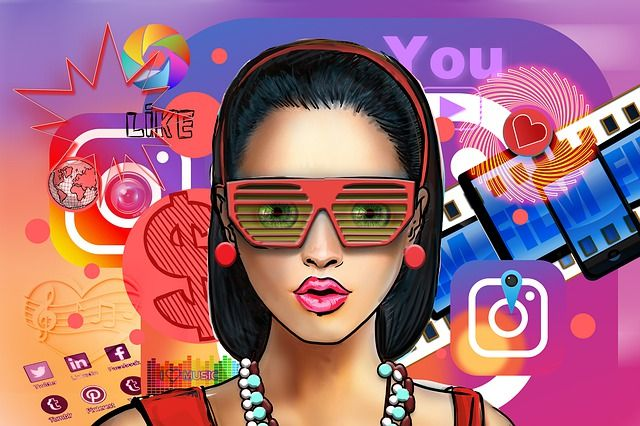

<small>Image from <a href="https://pixabay.com/de/users/geralt-9301/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=4492841">Gerd Altmann</a> on <a href="https://pixabay.com/de//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=4492841">Pixabay</a></small>

The dataset is stored in a file called "Top_Influencers.csv" in the data-directory.

🔨 **Your task**: Load the dataset as a dataframe into a variable called influencer_df using pandas

In [2]:
import pandas as pd

# Your code here:
influencer_df = pd.read_csv("data/Top_Influencers.csv")

In the next step we want to get a first overview about the data stored in the dataframe.

🔨 **Your task**: 
- Find out how many columns and how many rows there are in the dataset
- Find out how many null values there are

💡 Hint: Check out the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html">shape</a> property, <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html">describe</a> function and the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html">info</a> function.

In [3]:
# Your code here
print(influencer_df.shape)

(200, 11)


In [4]:
print(influencer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           200 non-null    int64  
 1   Rank                 200 non-null    int64  
 2   Channel Info         200 non-null    object 
 3   Influence Score      198 non-null    float64
 4   Followers            200 non-null    int64  
 5   Avg. Likes           200 non-null    int64  
 6   Posts                200 non-null    int64  
 7   60-Day Eng Rate      200 non-null    float64
 8   New Post Avg. Likes  200 non-null    int64  
 9   Total Likes          200 non-null    int64  
 10  Country Or Region    137 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 17.3+ KB
None


In [5]:
print(influencer_df.describe())

       Unnamed: 0          Rank  Influence Score     Followers    Avg. Likes  \
count  200.000000    200.000000       198.000000  2.000000e+02  2.000000e+02   
mean    99.500000    155.440000        81.828283  7.849100e+07  1.785050e+06   
std     57.879185    772.824349         8.917035  7.492015e+07  2.192133e+06   
min      0.000000      1.000000        22.000000  3.340000e+07  6.350000e+04   
25%     49.750000     51.750000        80.000000  4.067500e+07  4.990500e+05   
50%     99.500000    101.500000        84.000000  5.095000e+07  1.100000e+06   
75%    149.250000    151.250000        86.000000  7.050000e+07  2.125000e+06   
max    199.000000  11000.000000        93.000000  4.852000e+08  1.540000e+07   

              Posts  60-Day Eng Rate  New Post Avg. Likes   Total Likes  
count  2.000000e+02       200.000000         2.000000e+02  2.000000e+02  
mean   7.849100e+07         0.019160         7.849100e+07  7.849100e+07  
std    7.492015e+07         0.032577         7.492015e+07

In [6]:
print(influencer_df.isna().sum())

Unnamed: 0              0
Rank                    0
Channel Info            0
Influence Score         2
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      63
dtype: int64


There are 11 columns and 200 rows. Additionally, there are 2 missing values in the "Influencer Score" column and 63 missing alues in the "Country Or Region" column.

##### Filling the null values in the Influence Score
Unfortunately, some information got lost: The influence score contains null values. To be able to use the dataset, we need to fill them.

🔨 **Your task**: 
- Write down the methods you know to fill missing values.
- Fill the missing values in a dataframe called `df_without_missing_values`
- Write down which method to fill missing values you prefer and why.

💡 Hint: Check out the <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html">fillna</a> function to get some help for filling the missing values!

💡 Hint: You can also try out different methods to fill the missing values to see how they work

Ways to deal with missing values include:

* Using last value
* Listwise and Pairwise Deletion
* Mean Imputation
* Model based imputation

In [7]:
# Your code here
df_without_missing_values = influencer_df.fillna(method='backfill')

In [8]:
# Here you can see your result. Look for rank 53
df_without_missing_values.loc[(df_without_missing_values['Rank'] >= 50) & (df_without_missing_values['Rank'] <= 54), :]

,Unnamed: 0,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
49,49,50,\njennierubyjane,76.0,70500000,5200000,70500000,0.078,70500000,70500000,Canada
50,50,51,\nshawnmendes,83.0,70500000,3500000,70500000,0.025,70500000,70500000,Canada
51,51,52,\nnarendramodi,85.0,70200000,3000000,70200000,0.037,70200000,70200000,India
52,52,53,\ndeepikapadukone,78.0,69300000,1500000,69300000,0.009,69300000,69300000,India
53,53,54,\nronaldinho,78.0,68100000,868900,68100000,0.007,68100000,68100000,Brazil


In this case I prefer to use the previous or next value. If we look at the head of the data, it seems like the influencer score of accounts in the same rank-range tend to be the same. In contrast, if we look at the head and the tail we can see that the Influencer Score differs a lot and so the mean imputation wouldn't be suitable in this case.

In [9]:
df_without_missing_values.tail(10)

,Unnamed: 0,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
190,190,191,\nzidane,41.0,34000000,1000000,34000000,0.017,34000000,34000000,France
191,191,192,\nbmw,79.0,33800000,229000,33800000,0.002,33800000,33800000,Germany
192,192,193,\niambeckyg,71.0,33800000,623500,33800000,0.012,33800000,33800000,United States
193,193,194,\nrashmika_mandanna,84.0,33800000,2300000,33800000,0.044,33800000,33800000,India
194,194,195,\nsonamkapoor,75.0,33700000,265300,33700000,0.008,33700000,33700000,India
195,195,196,\nkhabib_nurmagomedov,63.0,33600000,680600,33600000,0.009,33600000,33600000,Russia
196,196,197,\ndanbilzerian,84.0,33600000,2200000,33600000,0.064,33600000,33600000,Canada
197,197,198,\nraisa6690,80.0,33600000,227800,33600000,0.003,33600000,33600000,Indonesia
198,198,199,\nluansantana,79.0,33500000,193300,33500000,0.003,33500000,33500000,Brazil
199,199,200,\nnancyajram,81.0,33400000,382500,33400000,0.004,33400000,33400000,France


🔨 **Your task**: Additionally, there is an outlier: Can you find it? How would you deal with the oulier in this case? What are other ways to deal with this?

In [10]:
# Your code to find outliers here
# --> Look at the .describe() output
df_without_missing_values.describe()
# Rank is once 11000.000000
df_without_missing_values[df_without_missing_values['Rank'] == 11000]
# Replace the rank with 11
df_without_missing_values.loc[df_without_missing_values['Rank'] == 11000, 'Rank'] = 11
# Look again at describe:
df_without_missing_values.describe()
# Now it is fixed

,Unnamed: 0,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes
count,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,2.000000e+02
mean,99.500000,100.495000,81.830000,7.849100e+07,1.785050e+06,7.849100e+07,0.019160,7.849100e+07,7.849100e+07
std,57.879185,57.886911,8.881187,7.492015e+07,2.192133e+06,7.492015e+07,0.032577,7.492015e+07,7.492015e+07
min,0.000000,1.000000,22.000000,3.340000e+07,6.350000e+04,3.340000e+07,0.000000,3.340000e+07,3.340000e+07
25%,49.750000,50.750000,80.000000,4.067500e+07,4.990500e+05,4.067500e+07,0.004000,4.067500e+07,4.067500e+07
50%,99.500000,100.500000,84.000000,5.095000e+07,1.100000e+06,5.095000e+07,0.009500,5.095000e+07,5.095000e+07
75%,149.250000,150.250000,86.000000,7.050000e+07,2.125000e+06,7.050000e+07,0.017250,7.050000e+07,7.050000e+07
max,199.000000,200.000000,93.000000,4.852000e+08,1.540000e+07,4.852000e+08,0.250000,4.852000e+08,4.852000e+08


I replaced the outlier with the probably correct value. I could see that 11 should be the right value, because I can use domain knowledge (after rank 10 and before rank 12 should be rank 11). Other ways to deal with outliers include: Retention (Ignore the outlier) or Remove (Drop the row with the outlier included).

🔨 **Your task**: Let's do some basic data exploration: How is the correlation between the Followers and the average likes? Calculate the correlation using Python and write a text about the strength of the correlation.

💡 Hint: Check out the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html">corr</a> function. You might have to create a new dataframe which contains only the columns you want to calculate the correlation on before you use the corr method!

In [11]:
# Your code here
corr_df = df_without_missing_values[['Followers', 'Avg. Likes']]
corr_df.corr()

,Followers,Avg. Likes
Followers,1.000000,0.346829
Avg. Likes,0.346829,1.000000


The correlation between average likes and followers is about 0.35. This indicates a weak, positive correlation. This means that the average likes tend to be higher with more followers.

🔨 **Your task**: Do a One-Hot-Encoding on the Country Or Region Column and add the columns to the dataframe. Afterwards, delete the country column so only the one-hot-encoded columns remain in the dataframe. Save the result in a variable called df_one_hot_encoded.

💡 Hint: Have a look <a href="https://datagy.io/pandas-get-dummies/">here</a> to find out how to do One-Hot-Encoding.

In [12]:
df_one_hot_encoded = pd.get_dummies(data=df_without_missing_values, columns=['Country Or Region'])

In [13]:
df_one_hot_encoded.columns

Index(['Unnamed: 0', 'Rank', 'Channel Info', 'Influence Score', 'Followers',
       'Avg. Likes', 'Posts', '60-Day Eng Rate', 'New Post Avg. Likes',
       'Total Likes', 'Country Or Region_Anguilla',
       'Country Or Region_Australia', 'Country Or Region_Brazil',
       'Country Or Region_British Virgin Islands', 'Country Or Region_Canada',
       'Country Or Region_Colombia', 'Country Or Region_Czech Republic',
       'Country Or Region_Côte d'Ivoire', 'Country Or Region_France',
       'Country Or Region_Germany', 'Country Or Region_India',
       'Country Or Region_Indonesia', 'Country Or Region_Italy',
       'Country Or Region_Mexico', 'Country Or Region_Netherlands',
       'Country Or Region_Puerto Rico', 'Country Or Region_Russia',
       'Country Or Region_Spain', 'Country Or Region_Sweden',
       'Country Or Region_Switzerland', 'Country Or Region_Turkey',
       'Country Or Region_United Arab Emirates',
       'Country Or Region_United Kingdom', 'Country Or Region_United

Additionally, let's have a look how OrdinalEncoding works here.

🔨 **Your task**: Do an Ordinal-Encoding on the Country Or Region Column. Save the result in a variable called `df_ordinal_encoded`.

💡 Hint: Have a look <a href="https://stackoverflow.com/questions/56502864/using-ordinalencoder-to-transform-categorical-values">here</a> to find out how to do Ordinal-Encoding. Read the question and the answer, then adapt the solution to our `df_without_missing_values`!

In [22]:
from sklearn.preprocessing import OrdinalEncoder

# Make a copy of the dataframe
df_ordinal_encoded = df_without_missing_values.copy()

enc = OrdinalEncoder()
enc.fit(df_without_missing_values[["Country Or Region"]])
df_ordinal_encoded[["Country Or Region"]] = enc.transform(df_without_missing_values[["Country Or Region"]])

df_ordinal_encoded

,Unnamed: 0,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,0,1,\ncristiano,92.0,485200000,8700000,485200000,0.013,485200000,485200000,17.0
1,1,2,kyliejenner,91.0,370700000,8199999,370700000,0.014,370700000,370700000,23.0
2,2,3,\nleomessi,90.0,363900000,6700000,363900000,0.010,363900000,363900000,23.0
3,3,4,\nselenagomez,93.0,348800000,6100000,348800000,0.005,348800000,348800000,23.0
4,4,5,\ntherock,91.0,339400000,1800000,339400000,0.003,339400000,339400000,23.0
...,...,...,...,...,...,...,...,...,...,...,...
195,195,196,\nkhabib_nurmagomedov,63.0,33600000,680600,33600000,0.009,33600000,33600000,16.0
196,196,197,\ndanbilzerian,84.0,33600000,2200000,33600000,0.064,33600000,33600000,4.0
197,197,198,\nraisa6690,80.0,33600000,227800,33600000,0.003,33600000,33600000,11.0
198,198,199,\nluansantana,79.0,33500000,193300,33500000,0.003,33500000,33500000,2.0


Finally, let's use PCA.

🔨 **Your task**: Drop the column "Channel Info" of the df_one_hot_encoded first and save the result as df_for_pca. Then apply PCA on the df_for_pca and look at the explained_variance_ratio.

💡 Hint: Have a look <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">here</a> to find out how to do PCA.

In [23]:
df_for_pca = df_one_hot_encoded.drop('Channel Info', axis="columns")

from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(df_for_pca)
print(pca.explained_variance_ratio_)

[9.99811760e-01 1.88240002e-04 1.52556589e-13 2.94843584e-15]
